# EXPLORATORY DATA ANALYSIS

IMPORTING THE IMPORTANT LIBRARIES

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
#Loading the train and test dataset
train=pd.read_csv('restaurant_data_Train.csv',encoding='latin1')
test=pd.read_csv('restaurant_data_Test.csv',encoding='latin1')

In [40]:
train.shape

(12690, 9)

In [41]:
test.shape

(4231, 8)

In [42]:
#adding an extra column source to know train and test datas and joing both datasets
train["source"]="train"
test["source"]="test"
test['COST']=0                                    #giving cost=0 in test data,inorder to avoid Nan values while joining train and test
d1=pd.concat([train,test],ignore_index=True)
d1.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am  4pm, 7:30pm  11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm  11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am  3:30pm, 7pm  11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am  1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,train
4,DESSERT PARLOR,15387,Desserts,11am  1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,train


In [43]:
d1.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
16916,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am  11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,0,test
16917,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am  1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,0,test
16918,QUICK BITES,8617,"Continental, North Indian",9:30am  10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,0,test
16919,QUICK BITES,6485,"Rolls, Beverages","11am  11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,0,test
16920,QUICK BITES,2421,Mughlai,5pm  1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes,0,test


In [44]:
d1.shape

(16921, 10)

#There are 16921 rows and 10 columns in this dataset

In [45]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          16921 non-null  object
 1   RESTAURANT_ID  16921 non-null  int64 
 2   CUISINES       16921 non-null  object
 3   TIME           16921 non-null  object
 4   CITY           16774 non-null  object
 5   LOCALITY       16793 non-null  object
 6   RATING         16917 non-null  object
 7   VOTES          15315 non-null  object
 8   COST           16921 non-null  int64 
 9   source         16921 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.3+ MB


#There are null values in our dataset
#there are object and integer datatype columns

In [46]:
#dropping unwanted column as it provides no information for our analysis
d1.drop('RESTAURANT_ID',axis=1,inplace=True)
d1.drop('LOCALITY',axis=1,inplace=True)
d1.drop('VOTES',axis=1,inplace=True)

In [47]:
#checking number of unique values in each row
d1.nunique()

TITLE        123
CUISINES    5183
TIME        3295
CITY         450
RATING        32
COST          87
source         2
dtype: int64

In [48]:
print(d1["RATING"].unique())

['3.6' '4.2' '3.8' '4.1' '4.0' '4.3' '3.9' '3.3' '3.4' '-' '4.5' '3.5'
 '4.4' '2.7' '3.7' '4.7' 'NEW' '3.1' '2.5' '4.6' '2.8' nan '3.0' '3.2'
 '2.6' '2.9' '4.9' '4.8' '2.4' '2.3' '2.0' '2.1' '2.2']


In [49]:
d1["RATING"].replace("NEW","1",inplace=True)
d1["RATING"].replace("-","1",inplace=True)
d1["RATING"].replace("nan","1",inplace=True)

In [50]:
#converting object datatype columns into integer using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=["TITLE","CUISINES","TIME","CITY","RATING","source"]
for val in list1:
    d1[val]=le.fit_transform(d1[val].astype(str))

In [51]:
#checking for null values
d1.isnull().values.any()

False

In [52]:
d1.isnull().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
RATING      0
COST        0
source      0
dtype: int64

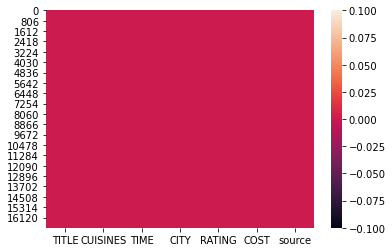

In [53]:
sns.heatmap(d1.isnull())

In [54]:
d1.describe()

,TITLE,CUISINES,TIME,CITY,RATING,COST,source
count,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000
mean,65.004137,2801.322380,1446.928491,178.173808,17.063471,491.410141,0.749956
std,35.875571,1504.771403,925.974559,109.323333,6.843125,612.654286,0.433051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1478.000000,681.000000,75.000000,15.000000,0.000000,0.000000
50%,64.000000,3054.000000,1372.000000,160.000000,19.000000,350.000000,1.000000
75%,104.000000,4008.000000,2265.000000,277.000000,21.000000,600.000000,1.000000
max,122.000000,5182.000000,3294.000000,450.000000,31.000000,14000.000000,1.000000


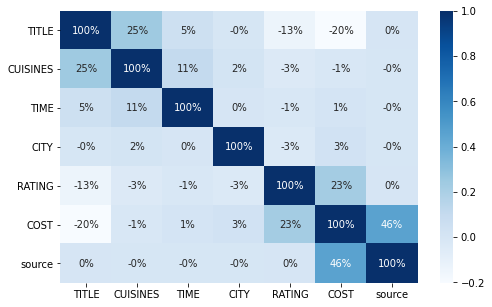

In [55]:
d1cor=d1.corr()
plt.figure(figsize=(8,5))
sns.heatmap(d1cor,cmap='Blues',annot=True,fmt='.0%')
plt.show()

In [56]:
#correlation can be expressed in matrix form
corr_matrix=d1.corr()
print(corr_matrix["COST"].sort_values(ascending=False))

COST        1.000000
source      0.463161
RATING      0.225989
CITY        0.029194
TIME        0.012660
CUISINES   -0.011417
TITLE      -0.201746
Name: COST, dtype: float64


In [57]:
collist=d1.columns.values
ncol=20
nrows=8

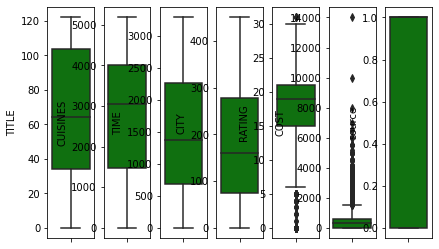

In [58]:
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d1[collist[i]],color='green',orient='v')

# UNIVARIATE ANALYSIS

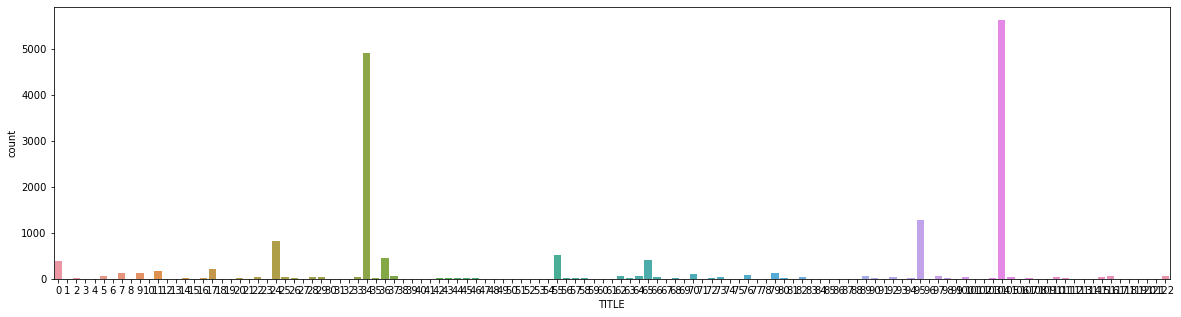

In [61]:
plt.subplots(figsize=(20,5))
sns.countplot(d1["TITLE"])

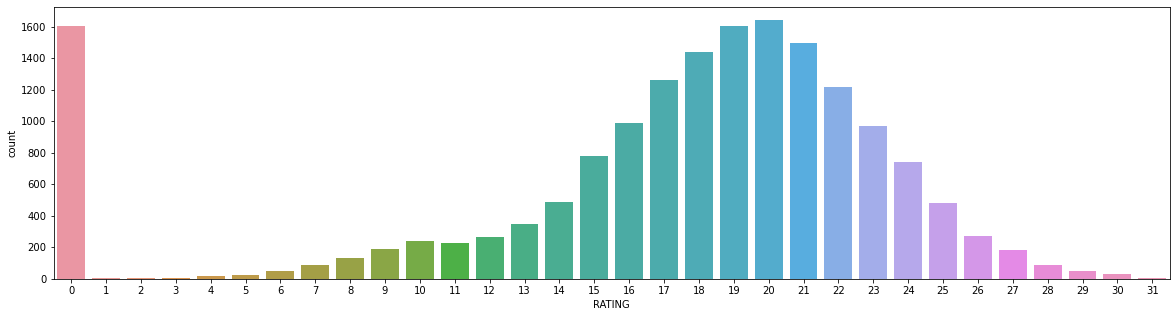

In [68]:
plt.subplots(figsize=(20,5))
sns.countplot(d1["RATING"])

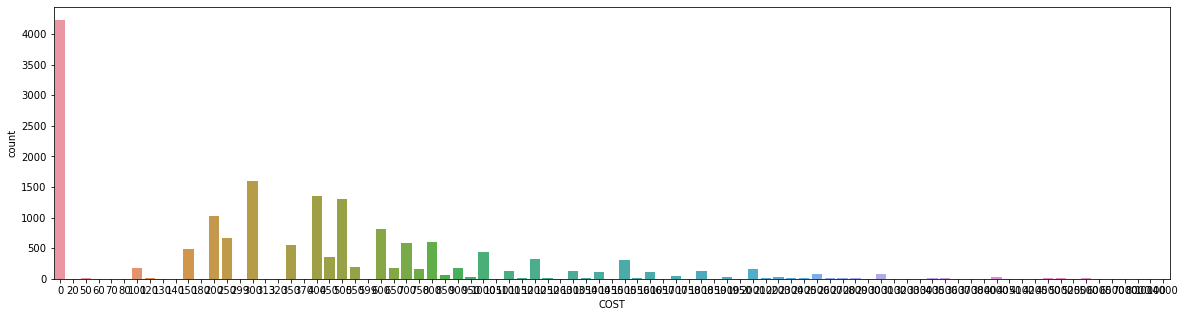

In [69]:
plt.subplots(figsize=(20,5))
sns.countplot(d1["COST"])

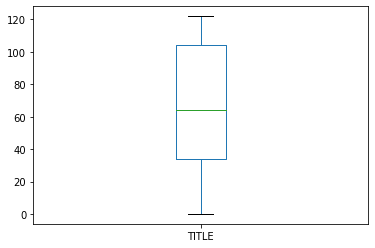

In [70]:
d1["TITLE"].plot.box()

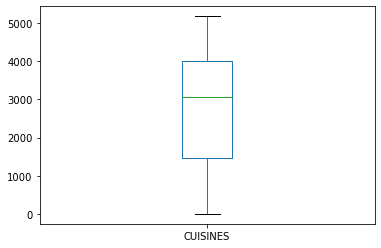

In [73]:
d1["CUISINES"].plot.box()

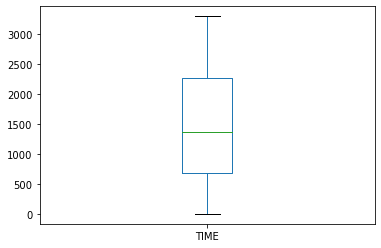

In [74]:
d1["TIME"].plot.box()

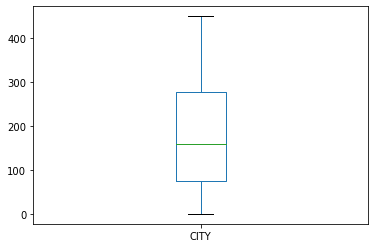

In [75]:
d1["CITY"].plot.box()

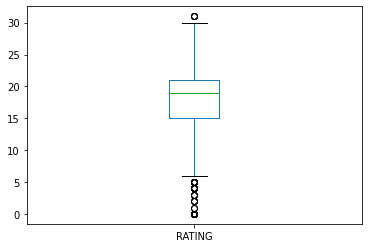

In [76]:
d1["RATING"].plot.box()

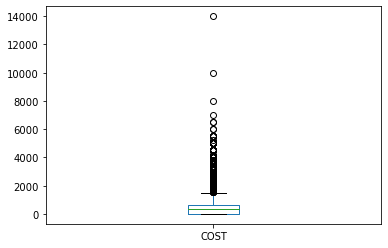

In [77]:
d1["COST"].plot.box()

#black dots in the boxplot represents outliers

# BIVARIATE ANALYSIS

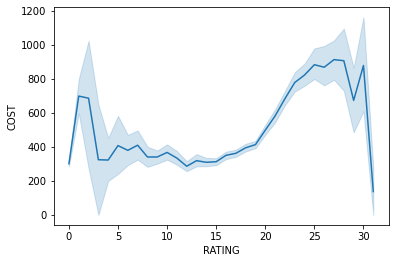

In [78]:
sns.lineplot(x="RATING",y="COST",data=d1)
plt.show()

we can see that as rating increases cost also increases.

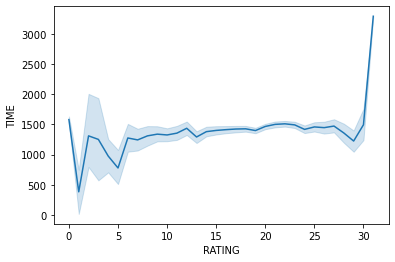

In [83]:
sns.lineplot(x="RATING",y="TIME",data=d1)
plt.show()

#we can rating and time also has a good positive relation.

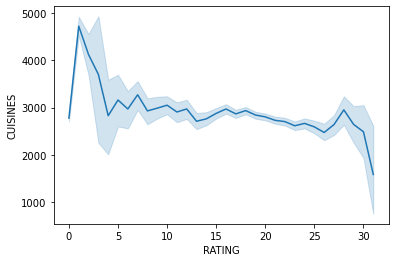

In [84]:
sns.lineplot(x="RATING",y="CUISINES",data=d1)
plt.show()

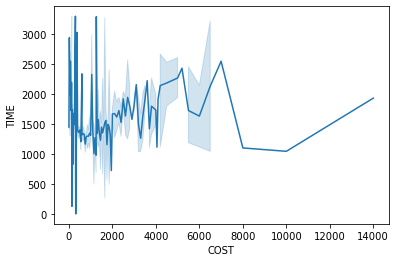

In [86]:
sns.lineplot(x="COST",y="TIME",data=d1)
plt.show()

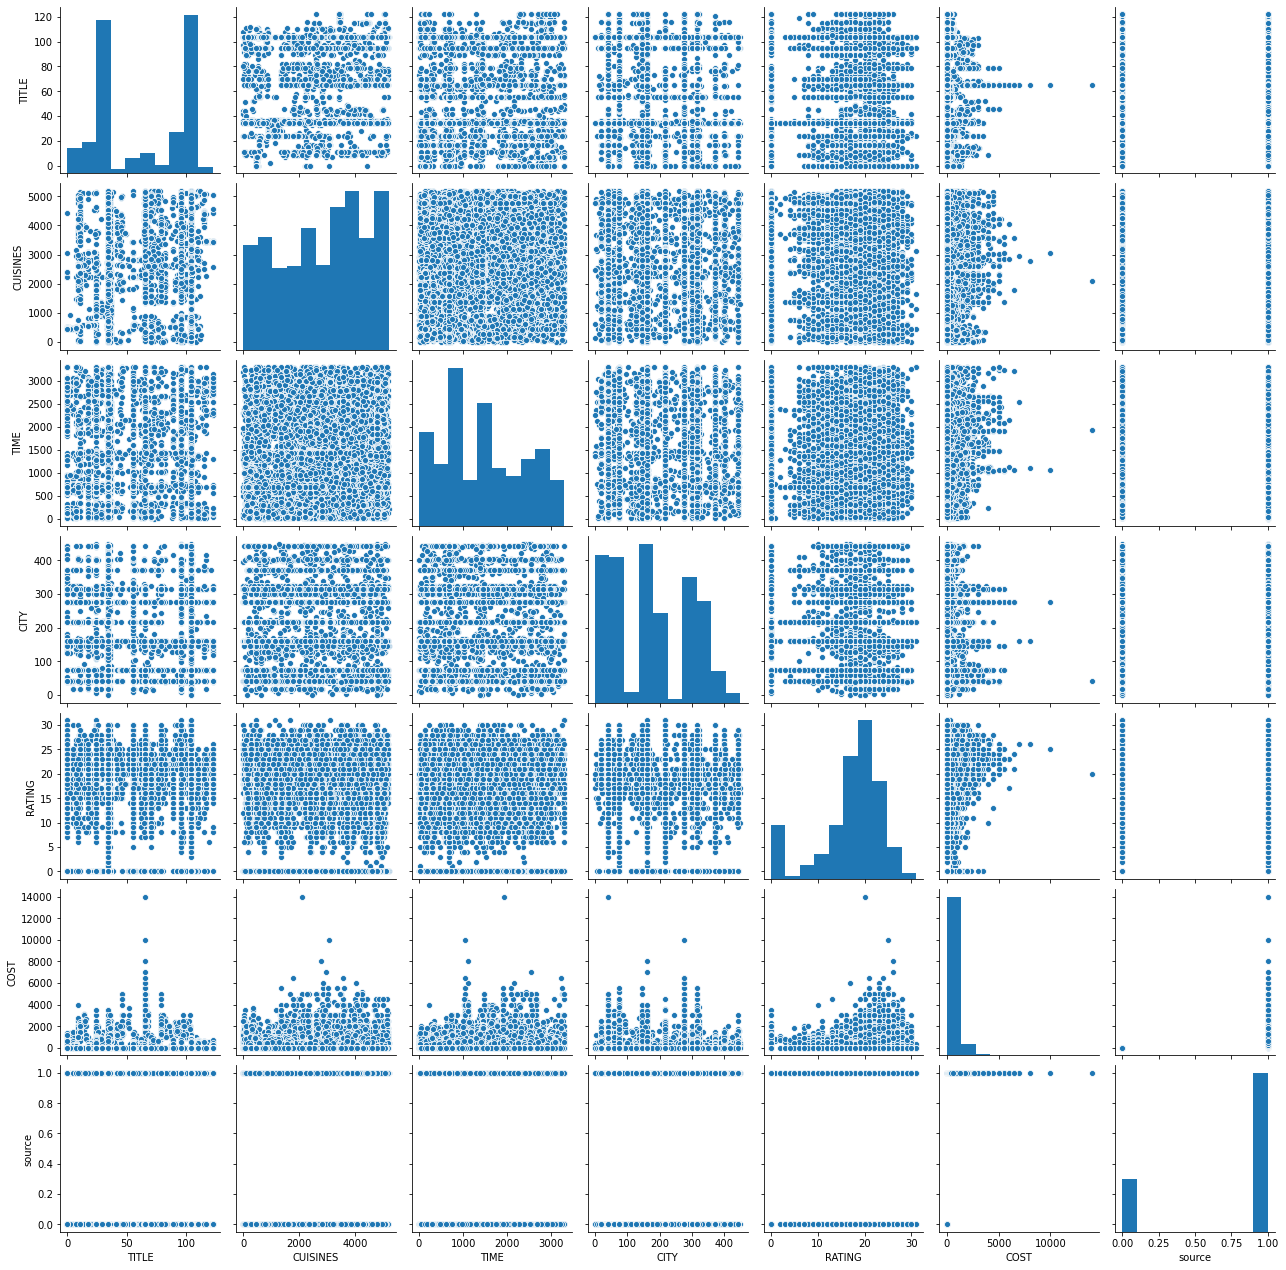

In [87]:
sns.pairplot(d1)

In [88]:
d1.skew()

TITLE      -0.061023
CUISINES   -0.229200
TIME        0.302563
CITY        0.285912
RATING     -1.291776
COST        3.713896
source     -1.154530
dtype: float64

In [90]:
#skewness can be removed using yeo_johnson method
from sklearn.preprocessing import power_transform
d1=pd.DataFrame(power_transform(d1,method='yeo-johnson'),columns=d1.columns)
d1.skew()

TITLE      -0.252697
CUISINES   -0.358482
TIME       -0.180734
CITY       -0.142637
RATING     -0.662946
COST       -0.355876
source     -1.154530
dtype: float64

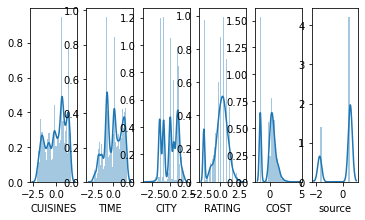

In [91]:
plt.figure(figsize=(20,30))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d1[collist[i]])

In [93]:
from scipy.stats import zscore
columns=['TITLE', 'CUISINES', 'TIME', 'CITY', 'RATING', 'COST', 'source']
for i in range(len(columns)):
    d1[columns[i]]=zscore(d1[columns[i]])
    for j in range(len(d1[columns[i]])):
        if d1[columns[i]][j]>3 or d1[columns[i]][j]<-3:
            d1[columns[i]].replace(d1[columns[i]][j],d1[columns[i]].median(),inplace=True)
            d1[columns[i]]=np.cbrt((d1[columns[i]]))

In [94]:
x=d1[columns]
y=d1[["COST"]]

In [95]:
print(x.shape)
print(y.shape)

(16921, 7)
(16921, 1)


In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.80089195,  0.36290511, -0.44257878, ..., -0.14423054,
         1.00152034,  0.57741851],
       [-0.73743695, -1.69876904,  0.92824109, ...,  0.97724271,
         1.06808175,  0.57741851],
       [-0.80089195,  0.63183885, -0.55960268, ...,  0.21111716,
         0.87091628,  0.57741851],
       ...,
       [ 1.05128431, -0.41530543,  1.38458084, ...,  0.03104009,
        -1.50412885, -1.73184611],
       [ 1.05128431,  1.14421153, -0.83870176, ..., -2.17331771,
        -1.50412885, -1.73184611],
       [ 1.05128431,  0.48535499,  0.80413843, ...,  0.03104009,
        -1.50412885, -1.73184611]])

In [97]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [98]:
max_r_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 40 is 1.0


In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=40)

In [100]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13536, 7)
(3385, 7)
(13536, 1)
(3385, 1)


# MODEL PREDICTION

In [101]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn .linear_model import Lasso,Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [102]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('******************************************************************************')
    print('\n')

score of LinearRegression() is: 1.0
Error:
Mean absolute error: 6.284977462150535e-16
Mean squared error: 5.3822442187517925e-31
Root mean squared error: 7.336378001951503e-16
r2_score: 1.0
******************************************************************************


score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 4.520231929302275e-05
Mean squared error: 3.1253770821979523e-06
Root mean squared error: 0.0017678736047008429
r2_score: 0.9999959579540305
******************************************************************************


score of KNeighborsRegressor() is: 0.9933405579808294
Error:
Mean absolute error: 0.05797191719006773
Mean squared error: 0.00792619593018591
Root mean squared error: 0.08902918583355635
r2_score: 0.9897490614826964
******************************************************************************


score of SVR() is: 0.9972841136766869
Error:
Mean absolute error: 0.038678964014202885
Mean squared error: 0.0021547386625820827
Root mean sq

In [103]:
#Linear regression itself gives maximum r2_score,so checking its cross val score
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lrscores=cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[1. 1. 1. 1. 0.]
0.8 0.4


In [104]:
import joblib
joblib.dump(lr,'lr_restaurant_cost.pkl')

['lr_restaurant_cost.pkl']